In [2]:
import torch
from diffusers import DPMSolverMultistepScheduler, StableDiffusionPipeline

model_id = "stabilityai/stable-diffusion-2-1"

# Use the DPMSolverMultistepScheduler (DPM-Solver++) scheduler here instead
pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to("cuda")



/home/anhcoder/anaconda3/envs/dev/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2023-07-02 11:50:17.160126: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-02 11:50:18.055063: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [11]:
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from matplotlib import cm
from matplotlib import pyplot as plt
def visual_img(image_origin: np.ndarray,
            #    image_gray: np.ndarray,
               image_binary: np.ndarray,
               image_processed: np.ndarray,
               title1: str = "image_origin",
            #    title2: str = "image_gray",
               title3: str = "image_binary",
               title4: str = "image_processed"):
    """
        Visuallize image between 2 ndarray image
    """
    cmap_val = 'gray'
    fig, (ax1, ax3, ax4) = plt.subplots(nrows=1, ncols=3, figsize=(50, 100))
    # ax1.axis("off")
    # ax2.axis("off")
    ax3.axis("off")
    ax4.axis("off")

    ax1.title.set_size(20)
    # ax2.title.set_size(20)
    ax3.title.set_size(20)
    ax4.title.set_size(20)

    ax1.title.set_text(title1)
    # ax2.title.set_text(title2)
    ax3.title.set_text(title3)
    ax4.title.set_text(title4)


    # ax1.imshow(cv.cvtColor(image_origin, cv.COLOR_BGR2RGB))
    # # ax2.imshow(cv.cvtColor(image_gray, cv.COLOR_BGR2RGB))
    # ax3.imshow(cv.cvtColor(image_binary, cv.COLOR_BGR2RGB))
    # ax4.imshow( cv.cvtColor(image_processed, cv.COLOR_BGR2RGB))
    
    ax1.imshow(image_origin)
    # ax2.imshow(image_gray)
    ax3.imshow(image_binary)
    ax4.imshow(image_processed)
    plt.show()

In [4]:
prompt = "super car, green, six doors"
images = pipe(prompt).images
text = re.sub("\W", "_", prompt)
for i, im in enumerate(images):
    im.save(f"{text}_{i}.png")

100%|██████████| 50/50 [00:05<00:00,  8.92it/s]


Lora finetune

In [4]:
from huggingface_hub import model_info
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler, StableDiffusionInpaintPipeline
import matplotlib.pyplot as plt
from PIL import Image

unet/diffusion_pytorch_model.safetensors not found
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
100%|██████████| 50/50 [00:06<00:00,  7.94it/s]


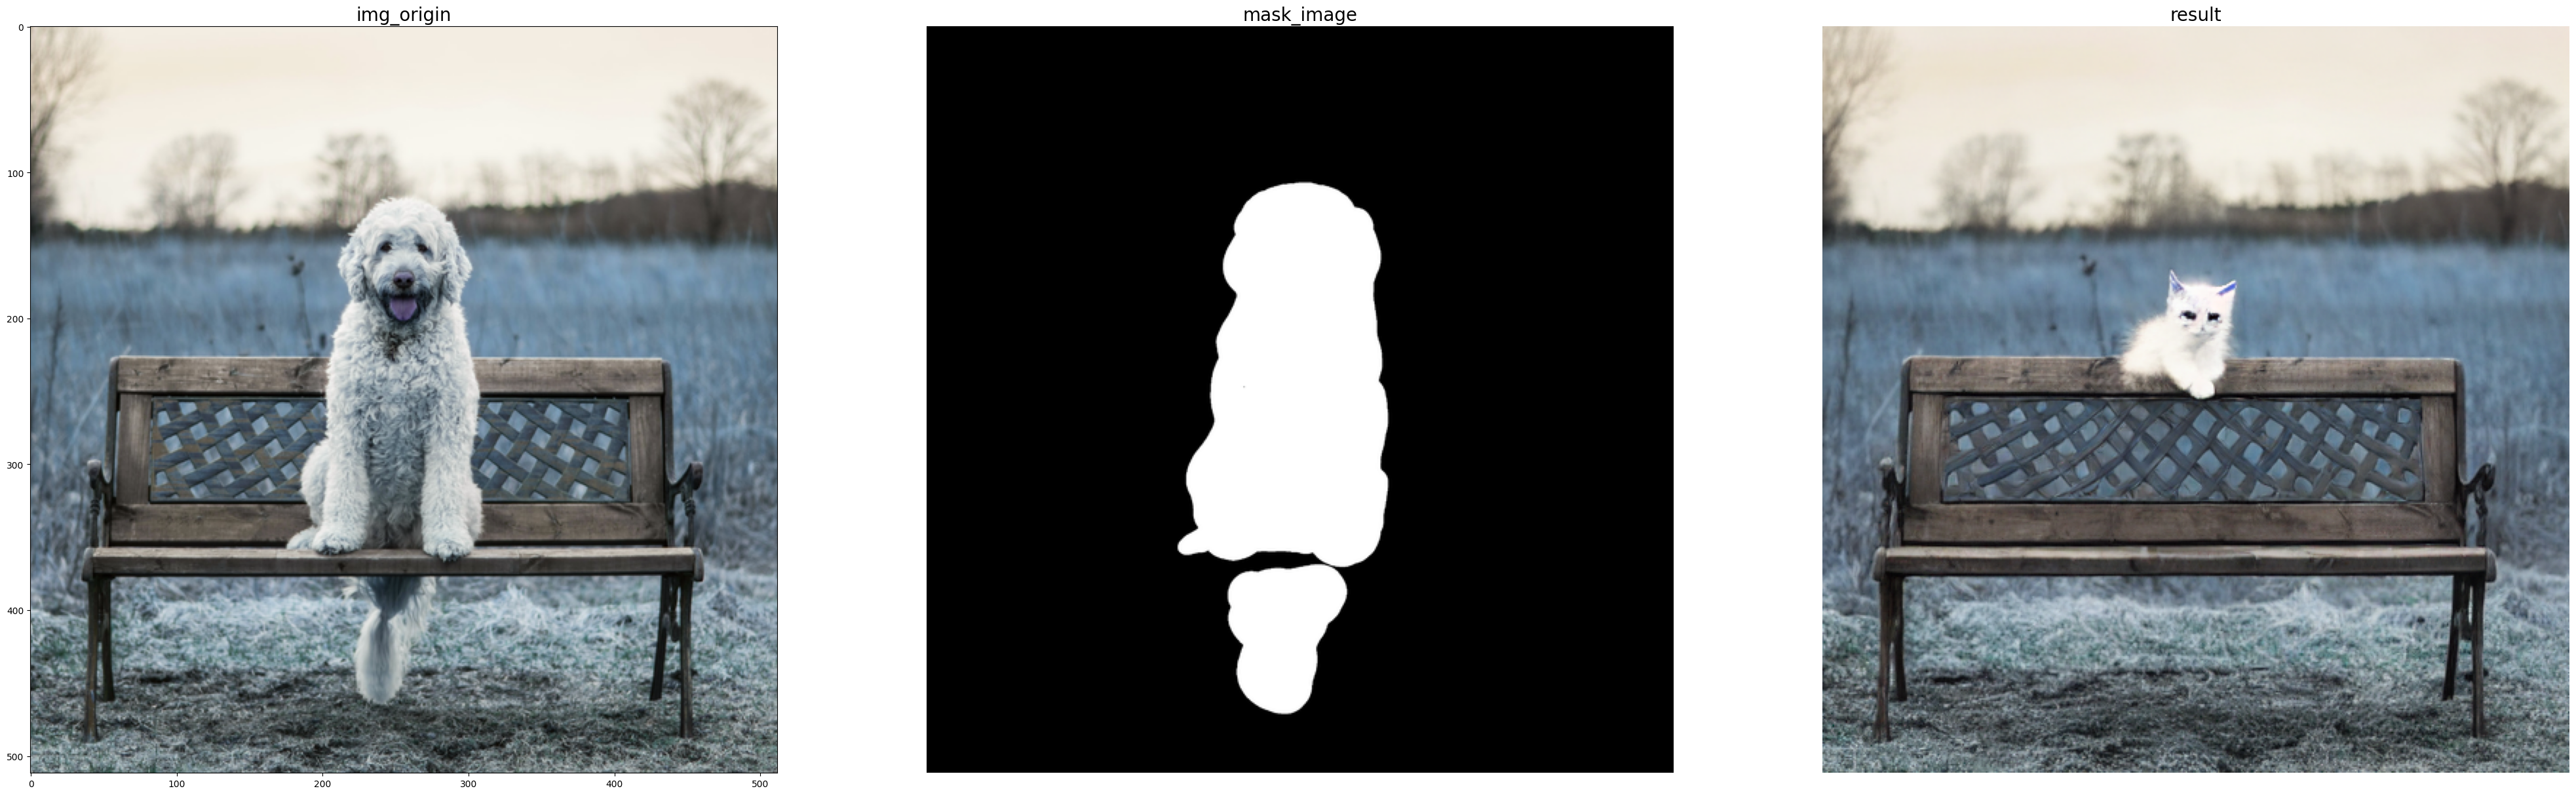

In [15]:
pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    # revision="fp16",
    # torch_dtype=torch.float16,
)
prompt = "kitten, high resolution, sitting on a park bench"
negative_prompt = ""
pipe = pipe.to("cuda")
#image and mask_image should be PIL images.
#The mask structure is white for inpainting and black for keeping as is
img = Image.open("/home/anhcoder/repos/github.com/khoa-nguyendang/simple-stable-diffusion-model/dog_in_bench.png")
mask_image = Image.open("/home/anhcoder/repos/github.com/khoa-nguyendang/simple-stable-diffusion-model/dog_in_bench_mask.png")
image = pipe(prompt=prompt, negative_prompt=negative_prompt, image=img, mask_image=mask_image).images[0]

visual_img(cv.cvtColor(np.asarray(img), cv.COLOR_BGR2RGB), cv.cvtColor(np.asarray(mask_image), cv.COLOR_BGR2RGB), cv.cvtColor(np.asarray(image), cv.COLOR_BGR2RGB), "img_origin", "mask_image", "result")

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
100%|██████████| 30/30 [00:01<00:00, 17.79it/s]


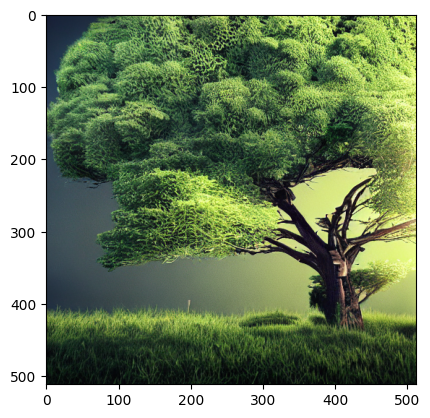

In [31]:

# LoRA weights ~3 MB
# model_path = "/mnt/k/AI_Models/SD/v2-1_768-nonema-pruned.ckpt"
lora_path = "/mnt/k/AI_Models/LoRa/diffusiondb-pixelart/pytorch_lora_weights.bin"
model_path = "runwayml/stable-diffusion-v1-5"
# info = model_info(model_path)
# model_base = info.cardData["base_model"]
# print(model_base)   


pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
# pipe.load_lora_weights(pretrained_model_name_or_path_or_dict=lora_path)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
# pipe.unet.load_attn_procs(lora_path)
pipe.to("cuda")

prompt = "single tree,comfortable,reasonable structure,shock,high detail,abundant,8k,green,tree,Reasonable light and dark relationship,concept art,high detail,distinct"
negative_prompt = ""
# image = pipe("hero with sword", num_inference_steps=25).images[0]
image = pipe(prompt, negative_prompt=negative_prompt, num_inference_steps=30, guidance_scale=7.5).images[0]

plt.imshow(image)
plt.show()

In [41]:


# LoRA weights ~3 MB
# model_path = "/mnt/k/AI_Models/SD/v2-1_768-nonema-pruned.ckpt"
cache_dir = "/home/anhcoder/repos/github.com/khoa-nguyendang/simple-stable-diffusion-model/_cache"
lora_path = "/mnt/k/AI_Models/LoRa/diffusiondb-pixelart/pytorch_lora_weights.bin"
model_path = "stabilityai/stable-diffusion-2-1"
# info = model_info(model_path)
# model_base = info.cardData["base_model"]
# print(model_base)   


pipe = StableDiffusionPipeline.from_pretrained(model_path, cache_dir=cache_dir,  torch_dtype=torch.float16)
# pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.load_lora_weights(pretrained_model_name_or_path_or_dict=lora_path, cache_dir=cache_dir)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
# pipe.unet.load_attn_procs(lora_path, model_path)
pipe.to("cuda")

prompt = "single tree,comfortable,reasonable structure,shock,high detail,abundant,8k,green,tree,Reasonable light and dark relationship,concept art,high detail,distinct"
# image = pipe("hero with sword", num_inference_steps=25).images[0]
image = pipe(prompt, num_inference_steps=30, guidance_scale=7.5).images[0]

plt.imshow(image)
plt.show()

SafetensorError: Error while deserializing header: HeaderTooLarge